In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('D:\\TARUN\\MBIT\\summer internship\\arimad\\train.csv')
features = pd.read_csv('D:\\TARUN\\MBIT\\summer internship\\arimad\\features.csv')
stores = pd.read_csv('D:\\TARUN\\MBIT\\summer internship\\arimad\\stores.csv')
test = pd.read_csv('D:\\TARUN\\MBIT\\summer internship\\arimad\\test.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train_df1 = train.merge(features,how='left').merge(stores,how='left')

In [ ]:
train_df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [ ]:
train_df1 = train_df1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [ ]:
train_df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [ ]:
train_df1.loc[train_df1['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,B,118221


In [ ]:
train_df1 = train_df1.loc[train_df1['Weekly_Sales']>0]

In [ ]:
train_df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [ ]:
train_df1['Type'].value_counts()

Type
A    214961
B    162787
C     42464
Name: count, dtype: int64

In [ ]:
train_df1['day'] = pd.DatetimeIndex(train_df1['Date']).day
train_df1['month'] = pd.DatetimeIndex(train_df1['Date']).month
train_df1['year'] = pd.DatetimeIndex(train_df1['Date']).year

train_df1.drop(['Date'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_df1['IsHoliday'] = le.fit_transform(train_df1['IsHoliday'])
train_df1['Type'] = le.fit_transform(train_df1['Type'])

In [ ]:
train_df1

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,month,year
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,5,2,2010
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,12,2,2010
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,19,2,2010
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,26,2,2010
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,28,9,2012
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,5,10,2012
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,12,10,2012
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,19,10,2012


***Data Visualisation***


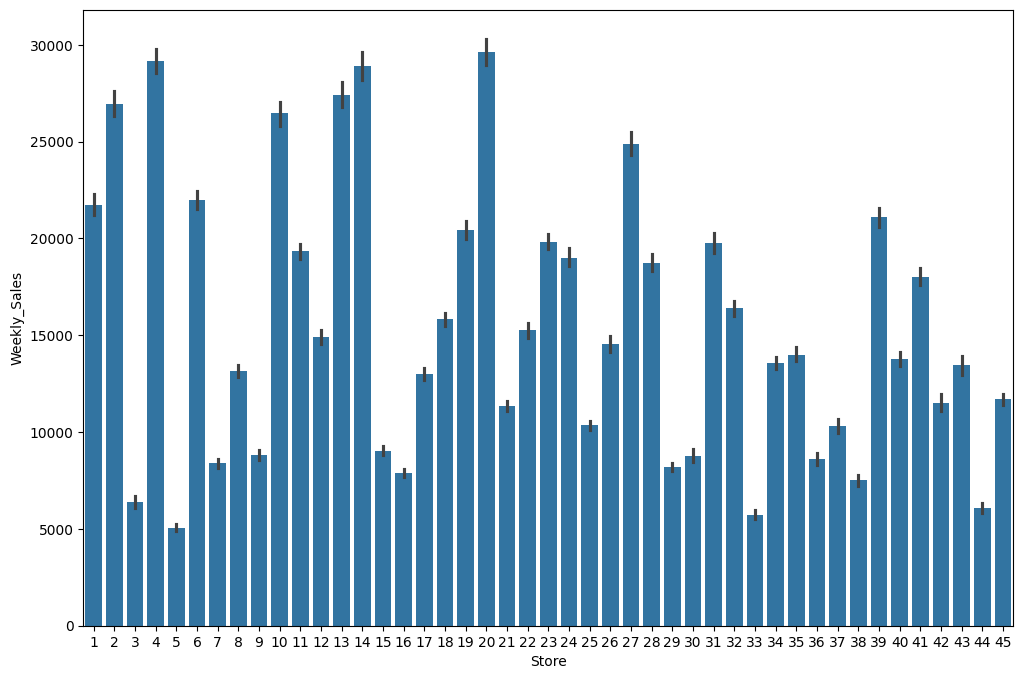

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(x='Store',y='Weekly_Sales',data=train_df1)
plt.show()

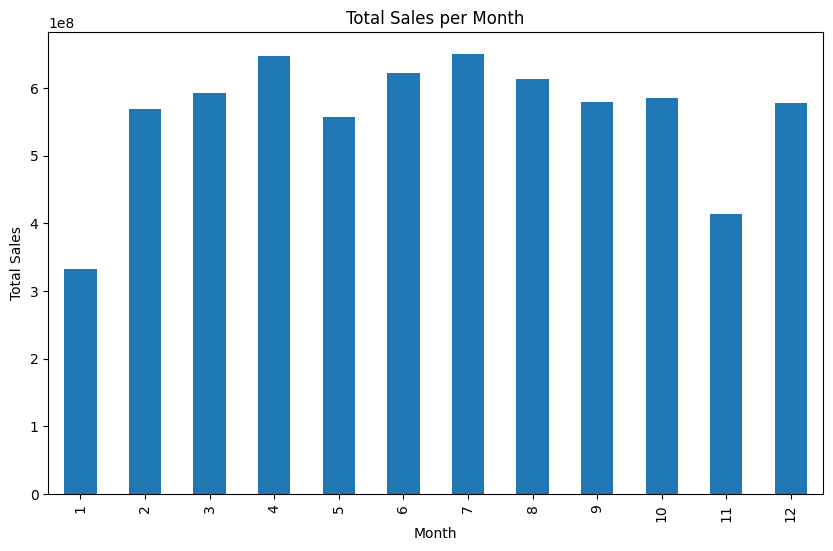

In [ ]:
# Sales per Month
monthly_sales = train_df1.groupby('month')['Weekly_Sales'].sum()
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

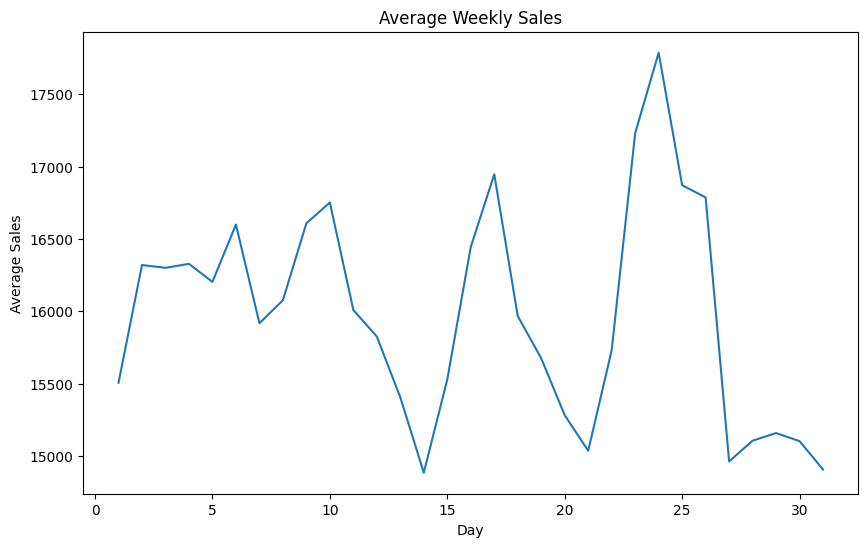

In [ ]:
# Average Weekly Sales
weekly_sales = train_df1.groupby('day')['Weekly_Sales'].mean()
plt.figure(figsize=(10,6))
weekly_sales.plot(kind='line')
plt.title('Average Weekly Sales')
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.show()

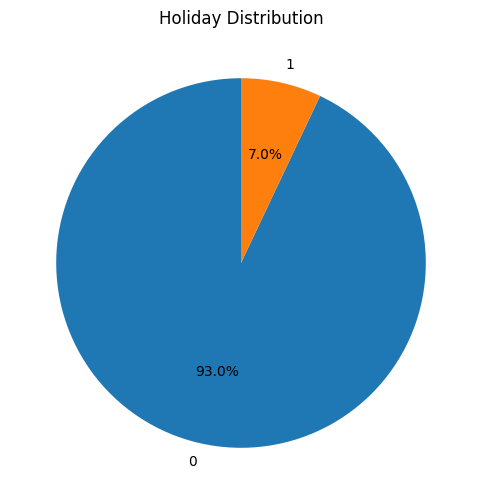

In [ ]:
# Holiday Distribution
holiday_distribution = train_df1['IsHoliday'].value_counts()
plt.figure(figsize=(6,6))
holiday_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Holiday Distribution')
plt.ylabel('')
plt.show()


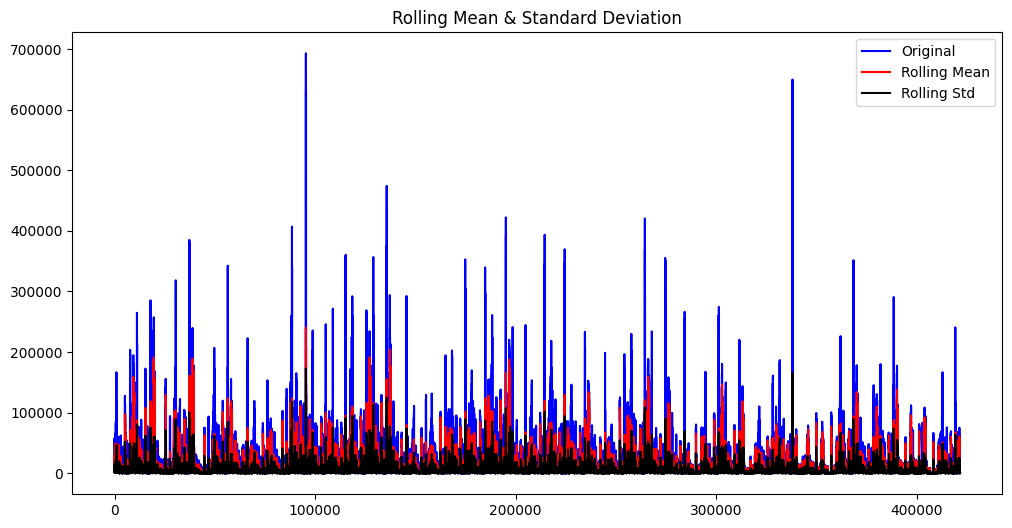

In [ ]:
# Rolling Mean and Standard Deviation
rolling_mean = train_df1['Weekly_Sales'].rolling(window=12).mean()
rolling_std = train_df1['Weekly_Sales'].rolling(window=12).std()
plt.figure(figsize=(12,6))
plt.plot(train_df1['Weekly_Sales'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show()

***Data Normalisation and Splitting***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Normalizing data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df1.drop(['Weekly_Sales'], axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=train_df1.columns.drop('Weekly_Sales'))
scaled_df['Weekly_Sales'] = train_df1['Weekly_Sales'].values

# Splitting the data into training and test sets
X = scaled_df.drop('Weekly_Sales', axis=1)
y = scaled_df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

***ARIMA Model Building and Prediction using ARIMA***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Mean Absolute Error (MAE): 3744599.78
Mean Squared Error (MSE): 15994651967363.06
Root Mean Squared Error (RMSE): 3999331.44


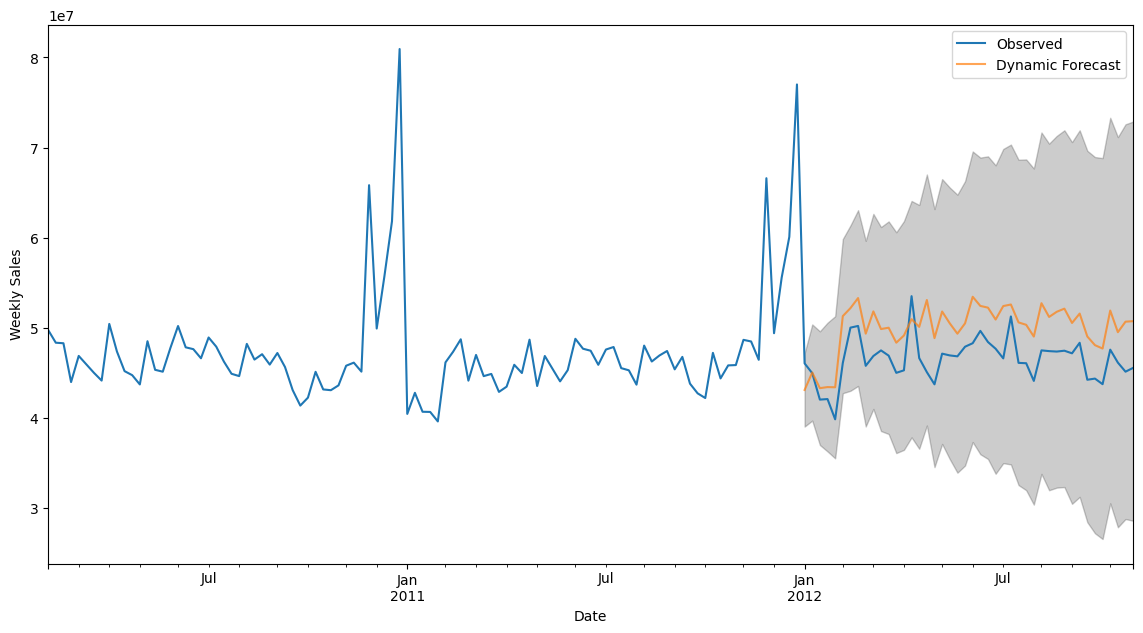

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Aggregating sales data weekly
train_df1['Date'] = pd.to_datetime(train_df1[['year', 'month', 'day']])
weekly_sales = train_df1.set_index('Date')['Weekly_Sales'].resample('W').sum()

# ARIMA model
model = SARIMAX(weekly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()

# Making predictions on the test set
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()

# Extracting the forecasted values and true values
y_forecasted = pred_dynamic.predicted_mean
y_truth = weekly_sales['2012-01-01':]

# Calculating the performance 

mae = mean_absolute_error(y_truth, y_forecasted)
mse = mean_squared_error(y_truth, y_forecasted)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plotting the results
ax = weekly_sales.plot(label='Observed', figsize=(14, 7))
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=0.7)
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.legend()
plt.show()




In [ ]:
print(mae)
print(mse)
print(rmse)

3744599.7826280966
15994651967363.06
3999331.4400488315


***Calculating MAPE***


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_truth, y_forecasted)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 8.09%
